In [48]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
%matplotlib inline

In [49]:
data = pd.read_csv('income.csv')
data.head(3)

,Name,Age,Income
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000


Text(0, 0.5, 'Income')

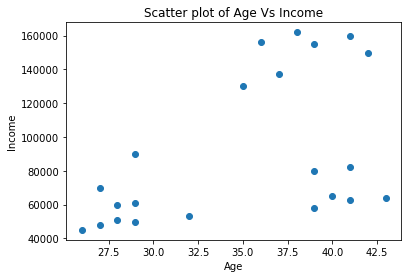

In [50]:
plt.scatter(data = data, x = 'Age', y = 'Income')
plt.title('Scatter plot of Age Vs Income')
plt.xlabel('Age')
plt.ylabel('Income')

### Here, it is clearly visible that there are 3 clusters. So, choosing value of 'K' is straightforward... need not be the case always 

### KMeans Model building on Raw dataset

In [51]:
km = KMeans(n_clusters= 3)
km 

KMeans(n_clusters=3)

In supervised learning models, we do model fitting, then predictions and calculations of accuracy score

In unsupervised learning models, we do fitting and prediction at the sametime

In [52]:
predictions = km.fit_predict(data[['Age', 'Income']])

In [53]:
predictions

array([0, 0, 2, 2, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2])

In [54]:
data['predictions'] = predictions
data.head(3)

,Name,Age,Income,predictions
0,Rob,27,70000,0
1,Michael,29,90000,0
2,Mohan,29,61000,2


In [55]:
## Coordinates of the cluster Centres
km.cluster_centers_

array([[3.40000000e+01, 8.05000000e+04],
       [3.82857143e+01, 1.50000000e+05],
       [3.29090909e+01, 5.61363636e+04]])

In [81]:
## Sum of Squared Errors
km.inertia_

1577046058.883117

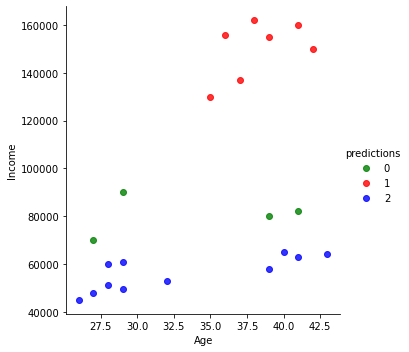

In [60]:
import seaborn as sns

sns.lmplot(data = data, x = 'Age', y = 'Income', hue = 'predictions', fit_reg  = False, palette = ['green', 'red', 'blue'])


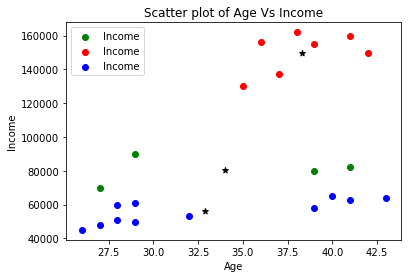

In [62]:
df0 = data[data['predictions'] == 0]
df1 = data[data['predictions'] == 1]
df2 = data[data['predictions'] == 2]

plt.scatter(data = df0, x= 'Age', y= 'Income', color = 'green')
plt.scatter(data = df1, x= 'Age', y= 'Income', color = 'red')
plt.scatter(data = df2, x= 'Age', y= 'Income', color = 'blue')

plt.title('Scatter plot of Age Vs Income')
plt.xlabel('Age')
plt.ylabel('Income')

## Also visualizing the cluster centres
plt.scatter(x= km.cluster_centers_[:,0], y= km.cluster_centers_[:,1], color = 'black', marker= '*')
## [:,0]= for all rows, take the values of 1st column (i.e. at index 0)
## [:,1]= for all rows take the values of 2nd column (i.e. at index 1)


plt.legend()

Here, we can observe that the green cluster is clearly defined... correctly,

but there is some issue in the red and black clusters

This issue is due to improper (i.e. unequal) scaling on the X axis (range = 15 yrs) and Y axis (range = 120000)

This issue of improper scaling is addressed by proper presprocessing of data using MinMaxScaler()

### Scaling Income and Age by using MinMaxScaler

Using MinMaxScaler(), we scale all the values of Income & Age between 0 to 1

In [63]:
## SCALING INCOME
scaler = MinMaxScaler()
scaler.fit(data[['Income']])
data['Income'] = scaler.transform(data[['Income']])

## SCALING AGE
scaler = MinMaxScaler()
scaler.fit(data[['Age']])
data['Age'] = scaler.transform(data[['Age']])


data

,Name,Age,Income,predictions
0,Rob,0.058824,0.213675,0
1,Michael,0.176471,0.384615,0
2,Mohan,0.176471,0.136752,2
3,Ismail,0.117647,0.128205,2
4,Kory,0.941176,0.897436,1
5,Gautam,0.764706,0.940171,1
6,David,0.882353,0.982906,1
7,Andrea,0.705882,1.000000,1
8,Brad,0.588235,0.948718,1
9,Angelina,0.529412,0.726496,1


### KMeans Model building on Scaled dataset

In [76]:
km1 = KMeans(n_clusters=3)
predictions1 = km1.fit_predict(data[['Age', 'Income']])
predictions1

array([1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0])

In [77]:
km1.cluster_centers_

array([[0.85294118, 0.2022792 ],
       [0.1372549 , 0.11633428],
       [0.72268908, 0.8974359 ]])

In [82]:
km1.inertia_

0.4750783498553097

In [78]:
data['predictions'] = predictions1
data

,Name,Age,Income,predictions
0,Rob,0.058824,0.213675,1
1,Michael,0.176471,0.384615,1
2,Mohan,0.176471,0.136752,1
3,Ismail,0.117647,0.128205,1
4,Kory,0.941176,0.897436,2
5,Gautam,0.764706,0.940171,2
6,David,0.882353,0.982906,2
7,Andrea,0.705882,1.000000,2
8,Brad,0.588235,0.948718,2
9,Angelina,0.529412,0.726496,2


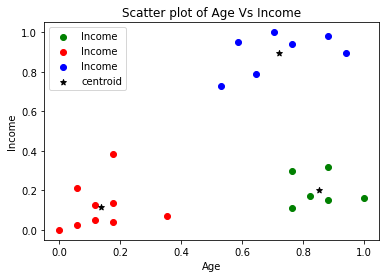

In [79]:
df0 = data[data['predictions'] == 0]
df1 = data[data['predictions'] == 1]
df2 = data[data['predictions'] == 2]

plt.scatter(data = df0, x= 'Age', y= 'Income', color = 'green')
plt.scatter(data = df1, x= 'Age', y= 'Income', color = 'red')
plt.scatter(data = df2, x= 'Age', y= 'Income', color = 'blue')


plt.title('Scatter plot of Age Vs Income')
plt.xlabel('Age')
plt.ylabel('Income')

## Also visualizing the cluster centres
plt.scatter(x= km1.cluster_centers_[:,0], y= km1.cluster_centers_[:,1], color = 'black', marker= '*', label= 'centroid')
## [:,0]= for all rows, take the values of 1st column (i.e. at index 0)
## [:,1]= for all rows take the values of 2nd column (i.e. at index 1)


plt.legend()

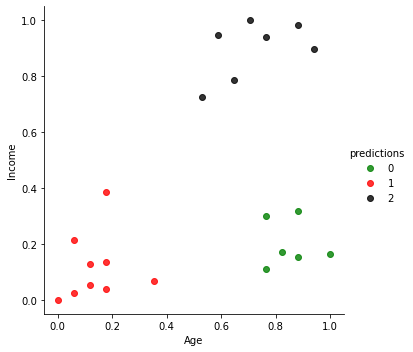

In [80]:
sns.lmplot(data = data, x = 'Age', y = 'Income', hue = 'predictions', fit_reg  = False, palette = ['green', 'red', 'black'])

#### Just out of curiosity, set the n_clusters = 6 in the above scaled model (subset the respective dataframes and plot the same) and see the difference

Here, there were only 3 features and the clusters were clearly visible using scatter plot. 

Nut in real life situations, there will be 'n' number of features that might not even fit into the scatter plot.

In such cases, we will need to use the Elbow Method for getting an idea about the optimal value of 'K'

### Elbow Method Demo

In [83]:
k_rng = range(1,11)
sse = []
for k in k_rng:
    km = KMeans(n_clusters= k)
    km.fit(data[['Age', 'Income']])
    sse.append(km.inertia_)

C:\Users\Manoj\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [84]:
sse

[5.434011511988179,
 2.091136388699078,
 0.4750783498553097,
 0.3491047094419566,
 0.2621792762345213,
 0.2187801089333045,
 0.1685851223602976,
 0.13781880133764024,
 0.10907864282306068,
 0.07996937425152907]

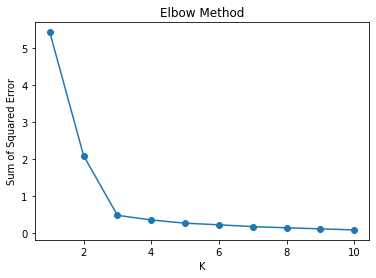

In [89]:
plt.title("Elbow Method")
plt.xlabel("K")
plt.ylabel("Sum of Squared Error")
plt.scatter(x = k_rng, y= sse)
plt.plot(k_rng, sse)

From the above plot, we can cross verify that the optimum value of K = 3